## Assignment Advanced Regression

#### Name :     Diwakar S
#### Course:   Executive PG Programme in Machine Learning & AI 
#### Batch :    February 2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score 
%matplotlib inline

from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler,MinMaxScaler


# Importing required statsmodels library
import statsmodels.api as sm

# From statsmodels importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor



# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Import Data
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Total of 81 columns are present

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Total of 1460 rows and 81 columns present in the data set 

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Deleting the unwanted columns 

The Id column is not required as it is additional data and doesnt specify anything necessary 

In [7]:
df = df.drop(['Id'],axis=1)

As seen in the dataset, it is found that many columns are having many zero values. So identifying columns with more zero values 


### Handling null values

In [8]:
df = df.dropna(axis = 1, how = 'all')          # using inbuilt dropna function to eliminate non-useful columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

There is no columns having all null values 

In [9]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

Data of 81 rows not visible so sorting out columns having null values in descending order.

In [10]:
null = pd.DataFrame(df.isnull().sum().sort_values(ascending=False),columns=["Number_of_null"])
null = null [null['Number_of_null']>500]
null

#Removing columns with more than 30% of null values, that is more than 500 null

,Number_of_null
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690


Removing columns with null values above 30%

In [11]:
df = df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)

In [12]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

### Verification of columns for same values 

In [13]:
x = list(df.columns)

for i in x:
  y = df[x].nunique()
y = pd.DataFrame(y)
y.columns = {'nunique'}
z = y[y['nunique']==0]
print (z)

less_unique = y[y['nunique']<5]
print (less_unique)

Empty DataFrame
Columns: [nunique]
Index: []
              nunique
Street              2
LotShape            4
LandContour         4
Utilities           2
LandSlope           3
MasVnrType          4
ExterQual           4
BsmtQual            4
BsmtCond            4
BsmtExposure        4
CentralAir          2
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
KitchenAbvGr        4
KitchenQual         4
Fireplaces          4
GarageFinish        3
PavedDrive          3


#### There are no columns with single value

#### Many columns are found to have less number of unique values,

#### If the % of one variable is very high than the others, then the meaning of the column will be become insignificant

#### Creating a classification in categorical column and a numerical column 

In [14]:
# categorical variable
cat_var = df.select_dtypes(include='object').columns
cat_var

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [15]:
# numerical variables
num_var = df.select_dtypes(exclude='object').columns
num_var

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

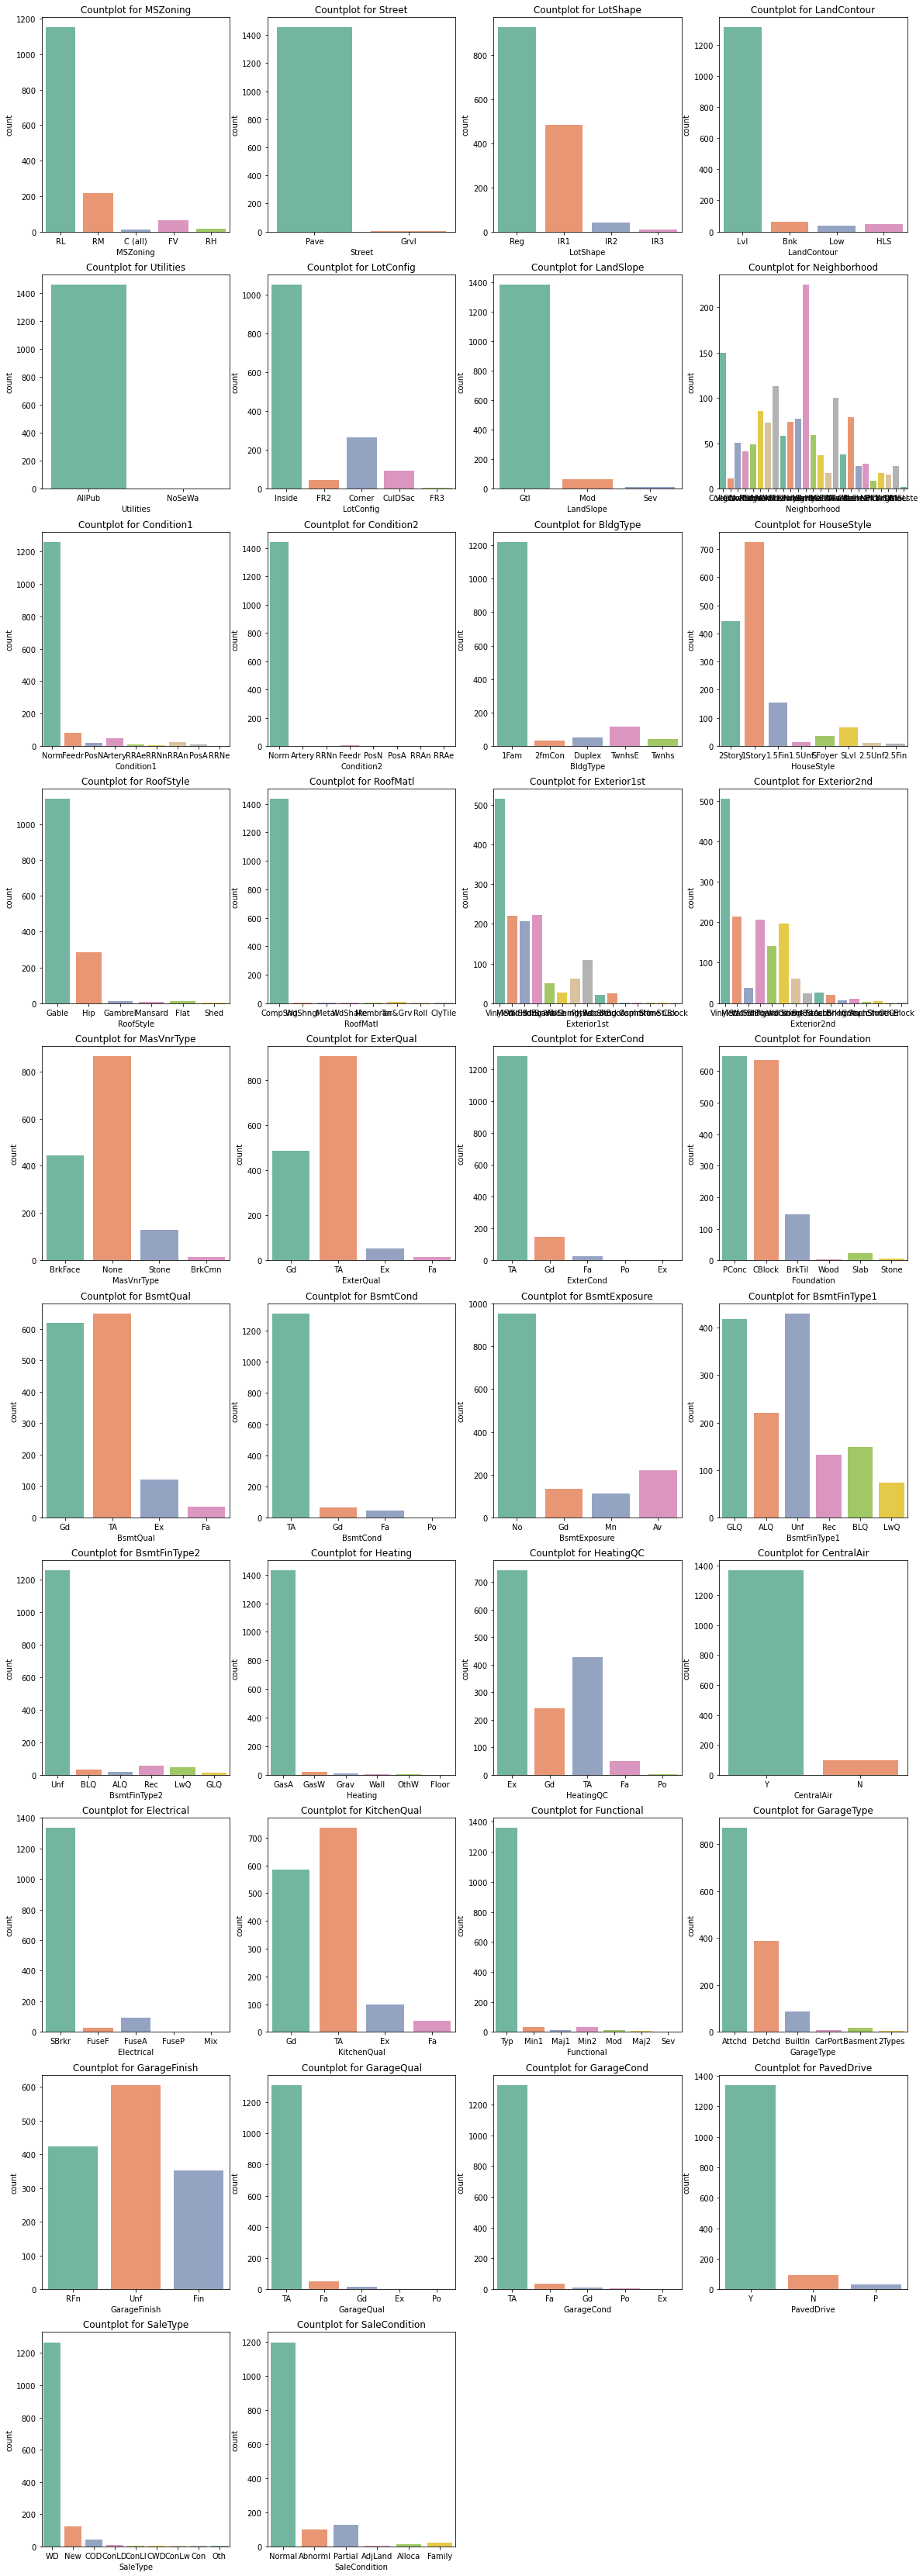

In [16]:
plt.figure(figsize=[20, 60])

for i, var in enumerate(cat_var,start=1):
    plt.subplot(10,4,i)
    sns.countplot(df[var], palette='Set2')
    plt.title(f"Countplot for {var}")

As per the above countplot, 

the columns mentioned below are having one value which is more in quantity than the other values in the column. 


That is the meaning of the column will become insignificant

1) street 
2) Utilities 
3) Condition2
4) RoofMatl
5) Heating 


#### Verifying the value counts to check whether to eliminate values or not 

In [17]:
df.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

Only 6 quantity in second type 

Therefore, removing streets from the set 

In [18]:
df = df.drop(['Street'],axis=1)

In [19]:
df.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Only 1 quantity in second type

Therefore, removing Utilities from the set

In [20]:
df = df.drop(['Utilities'],axis=1)

In [21]:
df.Condition2.value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

Only 15 quantity in other types

Therefore, removing Condition2 from the set

In [22]:
df = df.drop(['Condition2'],axis=1)

In [23]:
df.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

Only 26 quantity in other types

Therefore, removing RoofMatl from the set

In [24]:
df = df.drop(['RoofMatl'],axis=1)

In [25]:
df.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

Only 32 quantity in other types

Therefore, removing RoofMatl from the set

In [26]:
df = df.drop(['Heating'],axis=1)

Checking the current info of set

The same is to be done for the numerical columnsm

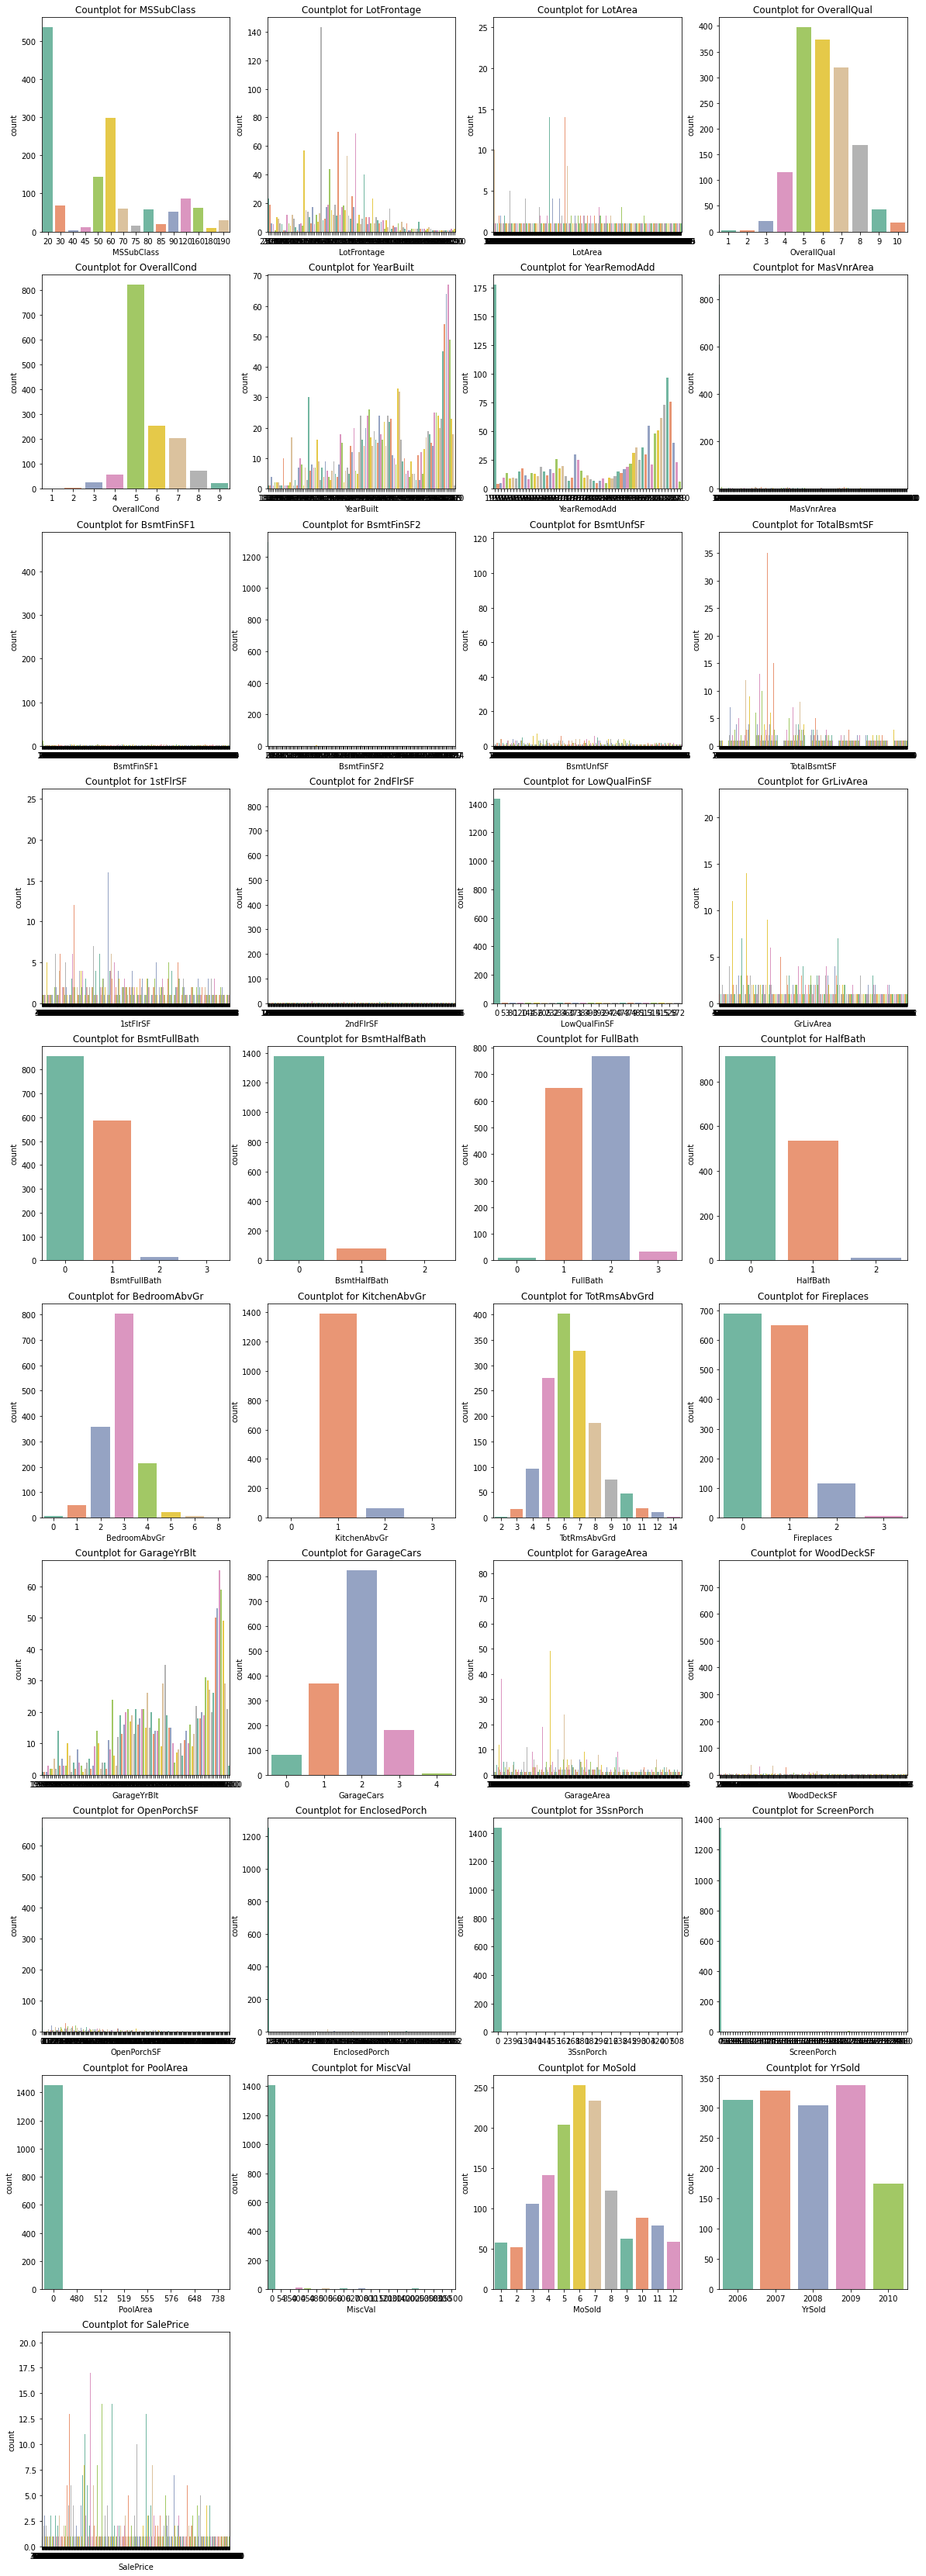

In [27]:
plt.figure(figsize=[20, 60])

for i, var in enumerate(num_var,start=1):
    plt.subplot(10,4,i)
    sns.countplot(df[var], palette='Set2')
    plt.title(f"Countplot for {var}")

As per the above countplot, 

the columns mentioned below are having one value which is more in quantity than the other values in the column. 


That is the meaning of the column will become insignificant

1) LowQualFinSF
2) 3SsnPorch
3) PoolArea
4) MiscVal
5) ScreenPorch
6) KitchenAbvGr

In [28]:
df.LowQualFinSF.value_counts()

0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64

1434 quantity in single types

Therefore, removing LowQualFinSF from the set

In [29]:
df = df.drop(['LowQualFinSF'],axis=1)

In [30]:
df['3SsnPorch'].value_counts()

0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64

1434 quantity in single types

Therefore, removing column from the set

In [31]:
df = df.drop(['3SsnPorch'],axis=1)

In [32]:
df['PoolArea'].value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

1453 quantity in single types

Therefore, removing column from the set

In [33]:
df = df.drop(['PoolArea'],axis=1)

In [34]:
df['MiscVal'].value_counts()

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64

1408 quantity in single types

Therefore, removing column from the set

In [35]:
df = df.drop(['MiscVal'],axis=1)

In [36]:
df['ScreenPorch'].value_counts()

0      1344
192       6
120       5
224       5
189       4
       ... 
291       1
260       1
385       1
156       1
40        1
Name: ScreenPorch, Length: 76, dtype: int64

1344 quantity in single types

Therefore, removing column from the set

In [37]:
df = df.drop(['ScreenPorch'],axis=1)

In [38]:
df.KitchenAbvGr.value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

1392 quantity in single types

Therefore, removing column from the set

In [39]:
df = df.drop(['KitchenAbvGr'],axis=1)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  Exterior1st    1460 non-null   object 
 18  Exterior

After removing the unwanted columns, the resulting set is having 65 coulmns

In [41]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
LotShape           0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 64, dtype: int64

In [42]:
# Number of Null values in Columns

x = list(df.columns)

for i in x:
  y = df[x].isnull().sum()
y = pd.DataFrame(y)
y.columns = {'Null'}
Null = y[y['Null']!=0]
Null['Dtype']=df[x].dtypes
print (Null)

              Null    Dtype
LotFrontage    259  float64
MasVnrType       8   object
MasVnrArea       8  float64
BsmtQual        37   object
BsmtCond        37   object
BsmtExposure    38   object
BsmtFinType1    37   object
BsmtFinType2    38   object
Electrical       1   object
GarageType      81   object
GarageYrBlt     81  float64
GarageFinish    81   object
GarageQual      81   object
GarageCond      81   object


The above are the number of null values in the columns 

Data to be imputed for the null values 

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  Exterior1st    1460 non-null   object 
 18  Exterior

### Imputing Missing values

<AxesSubplot:>

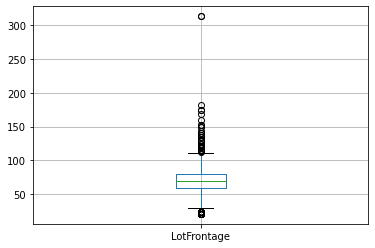

In [44]:
df.boxplot(column =['LotFrontage'])

Since there is outlier in the data, median has to be imputed

In [45]:
df.LotFrontage = df['LotFrontage'].fillna(df['LotFrontage'].median())

<AxesSubplot:>

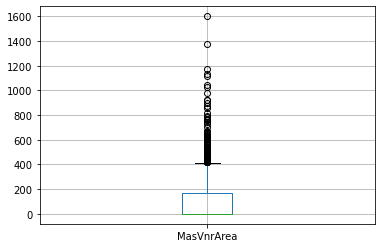

In [46]:
df.boxplot(column =['MasVnrArea'])

In [47]:
df.MasVnrArea  = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

<AxesSubplot:>

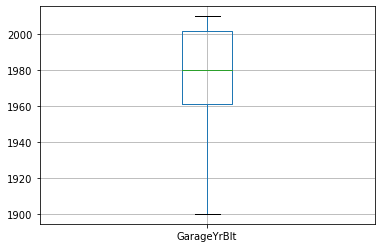

In [48]:
df.boxplot(column =['GarageYrBlt'])

In [49]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

In [50]:
df.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

Since GarageCond is a Categorical column mode has to be imputed

In [51]:
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

Imputing mode for all the categorical columns 

In [52]:
for x in ('GarageType', 'GarageFinish','GarageQual','BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual','MasVnrArea', 'MasVnrType', 'Electrical'):
    df[x] = df[x].fillna(df[x].mode()[0])

Now re-verifying the null values

In [53]:
null = pd.DataFrame(df.isnull().sum().sort_values(ascending=False),columns=["Number_of_null"])
null = null [null['Number_of_null']!=0]
null

,Number_of_null


As seen all the null values have been imputed

As seen in the above description few columns have single value as data

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  Exterior1st    1460 non-null   object 
 18  Exterior

## Outlier treatment

In [55]:
# categorical variable
cat_var = df.select_dtypes(include='object').columns
cat_var
print(len(cat_var))

33


In [56]:
# numerical variables
num_var = df.select_dtypes(include=['int64','float64']).columns
num_var
print(len(num_var))

31


### As seen above, there are outliers in the data. 

### These outliers has to be removed from the data to get more generalized model. 

In [57]:
Q1 = df[num_var].quantile(0.05) 
Q3 = df[num_var].quantile(0.95)
IQR = Q3 - Q1
df = df[~((df[num_var] < (Q1 - 1.5 * IQR)) |(df[num_var] > (Q3 + 1.5 * IQR))).any(axis=1)]

### Checking the output variable distribution 

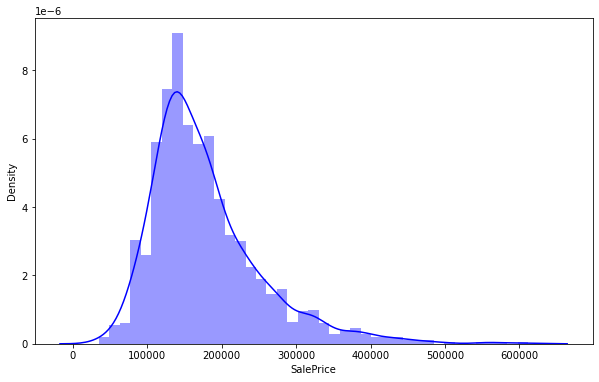

In [58]:
plt.figure(figsize=[10,6])
sns.distplot(df['SalePrice'],color='b')
plt.show()

As seen above, the targer variable is skewed.

This affects the performace of the regression model. 

Therefore, the skewness of the target variable is to be handled to make it a normal distribution,
which increases the performance of the model. 

### Skew

In [59]:
df['SalePrice'].skew()

1.5211661881010234

A positive value for skewness indicates that the tail is on the right side of the distribution, which extends towards more positive values.

### Kurtosis

In [60]:
df['SalePrice'].kurtosis()

3.547154547973838

An extreme positive kurtosis indicates a distribution where more of the numbers are located in the tails of the distribution instead of around the mean

Kurtosis value of normal distribution is 3 

This have 3.3, which is more towards normal distribution

<Figure size 1440x1080 with 0 Axes>

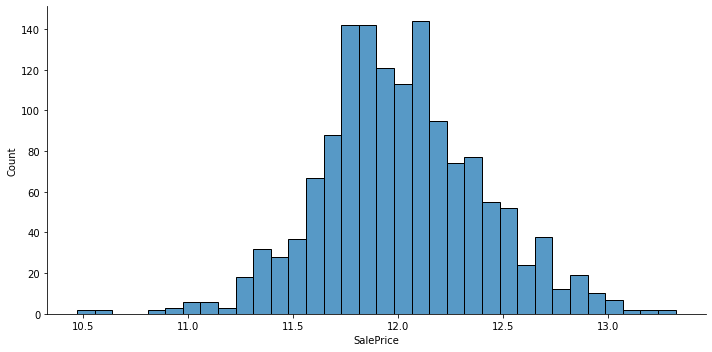

In [61]:
plt.figure(figsize=[20,15])
sns.displot(np.log(df['SalePrice']), aspect=2)
plt.show()

In [62]:
df['Transformed_SalePrice'] = np.log(df['SalePrice']) 

This tranformation is done for improvement in the performance of the model. 

In [63]:
print(df['Transformed_SalePrice'].skew())
print(df['Transformed_SalePrice'].kurtosis())

0.08943894724671275
0.5825455233841352


#### Transformed target variable seems to be normally distributed

In [64]:
df.shape

(1425, 65)

## EDA & Visualization

In [65]:
def plotting (var):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=var, y='SalePrice', data=df, width=1)
    plt.title(f"Comparison with 'SalePrice' ")
    plt.show()
   

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSSubClass             1425 non-null   int64  
 1   MSZoning               1425 non-null   object 
 2   LotFrontage            1425 non-null   float64
 3   LotArea                1425 non-null   int64  
 4   LotShape               1425 non-null   object 
 5   LandContour            1425 non-null   object 
 6   LotConfig              1425 non-null   object 
 7   LandSlope              1425 non-null   object 
 8   Neighborhood           1425 non-null   object 
 9   Condition1             1425 non-null   object 
 10  BldgType               1425 non-null   object 
 11  HouseStyle             1425 non-null   object 
 12  OverallQual            1425 non-null   int64  
 13  OverallCond            1425 non-null   int64  
 14  YearBuilt              1425 non-null   int64  
 15  Year

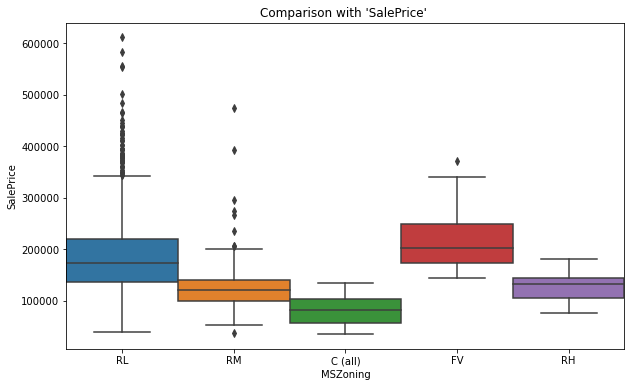

In [67]:
plotting(df.MSZoning)

Sales price increases in the pattern of :
1) C(all) 
2) RM 
3) RH
4) RL 
5) FV 

With more price range in RL 

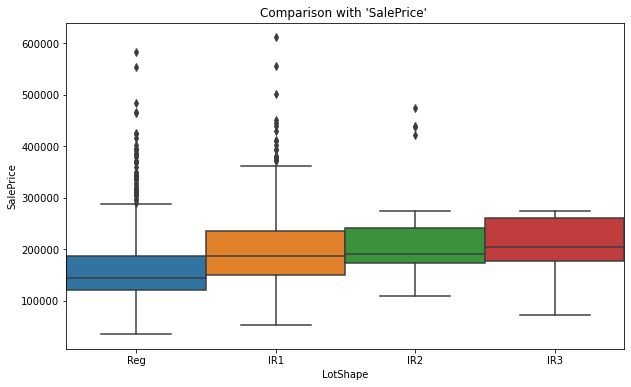

In [68]:
plotting(df.LotShape)

Sales price increases in the pattern of :
1) Reg 
2) IR1
3) IR2
4) IR3

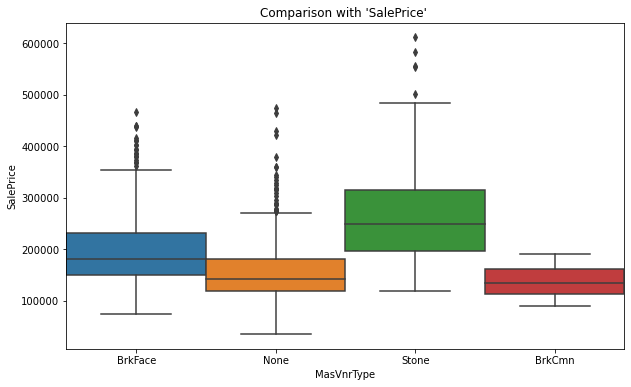

In [69]:
plotting(df.MasVnrType)

Sales price increases in the pattern of :

1) None
2) BrkCmn
3) BrkFace 
4) Stone 

with high range of price in Stone 

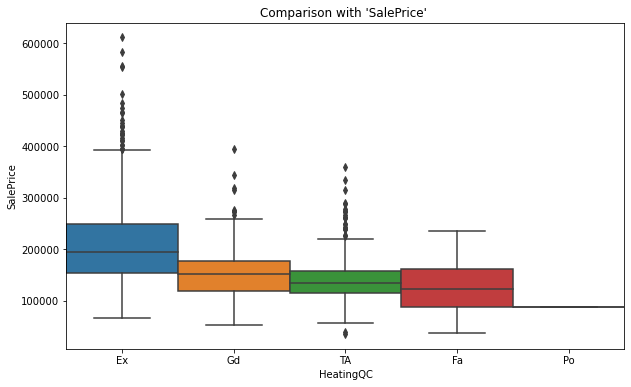

In [70]:
plotting(df.HeatingQC)

Sales price increases in the pattern of :

1) Po
2) Fa
3) TA 
4) Gd
5) Ex

with high range of price in Ex

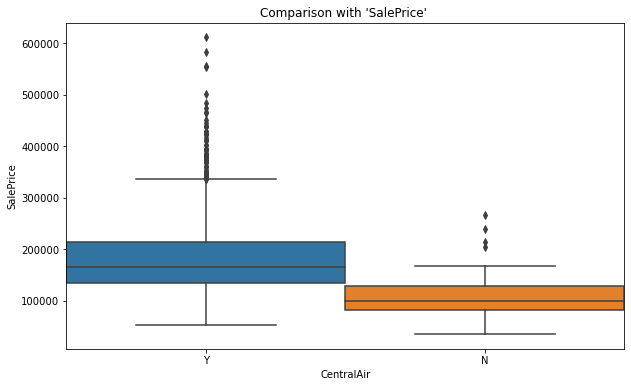

In [71]:
plotting(df.CentralAir)

Sale price has more range with high price if there is provision for central air than without central air

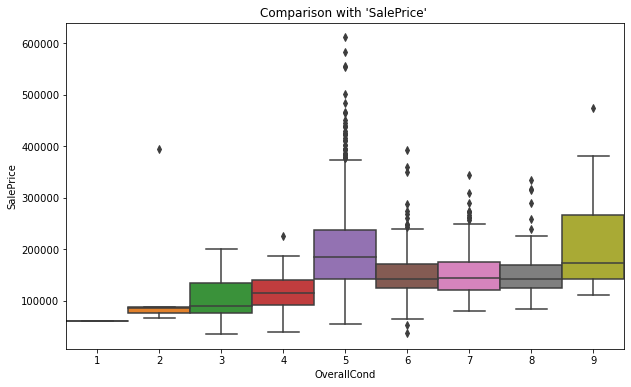

In [72]:
plotting(df.OverallCond)

As the overall condition increases, the sale price also increases

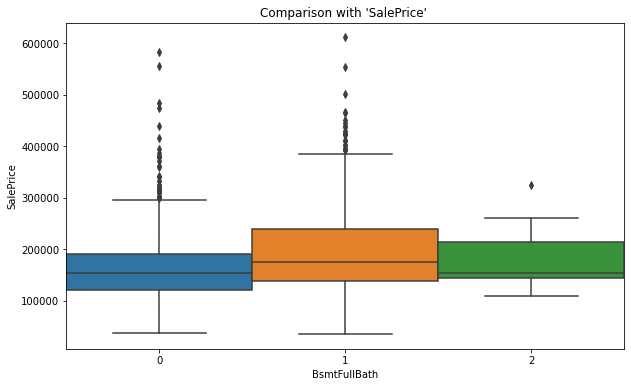

In [73]:
plotting(df.BsmtFullBath)

More are less, 

the price distribution with respect to basement full bath is similar in all types 

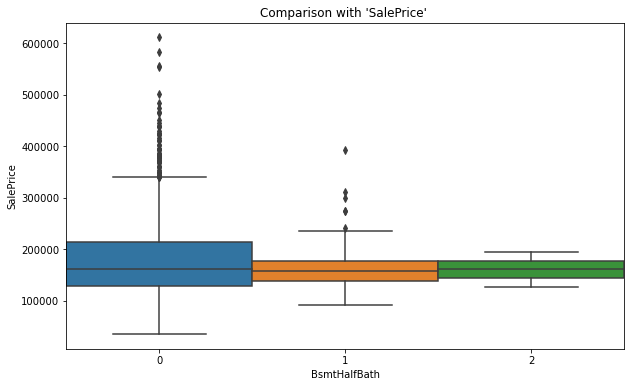

In [74]:
plotting(df.BsmtHalfBath)

Price range is similar, 

with more range and high price for not having half bath in basement

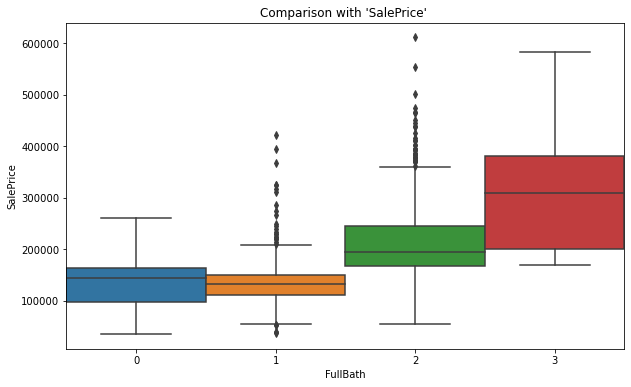

In [75]:
plotting(df.FullBath)

As number of full bath increases, the price is also increase 

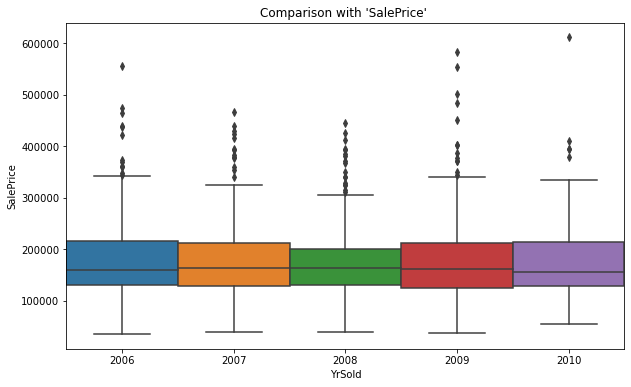

In [76]:
plotting(df.YrSold)

There is no relation between sale price and the year of sale  

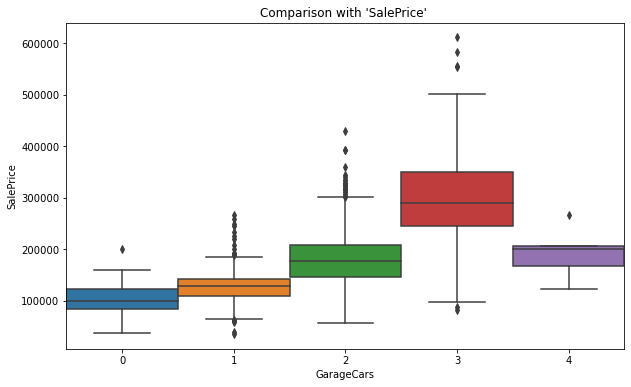

In [77]:
plotting(df.GarageCars)

Price increases as the number of garage cars increases, 

this remains increasing till the garage car is 3, after that price is decreasing 

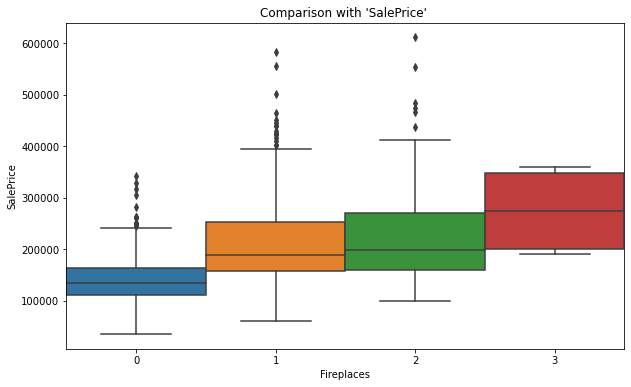

In [78]:
plotting(df.Fireplaces)

Price increases with increase in the number of fire places 

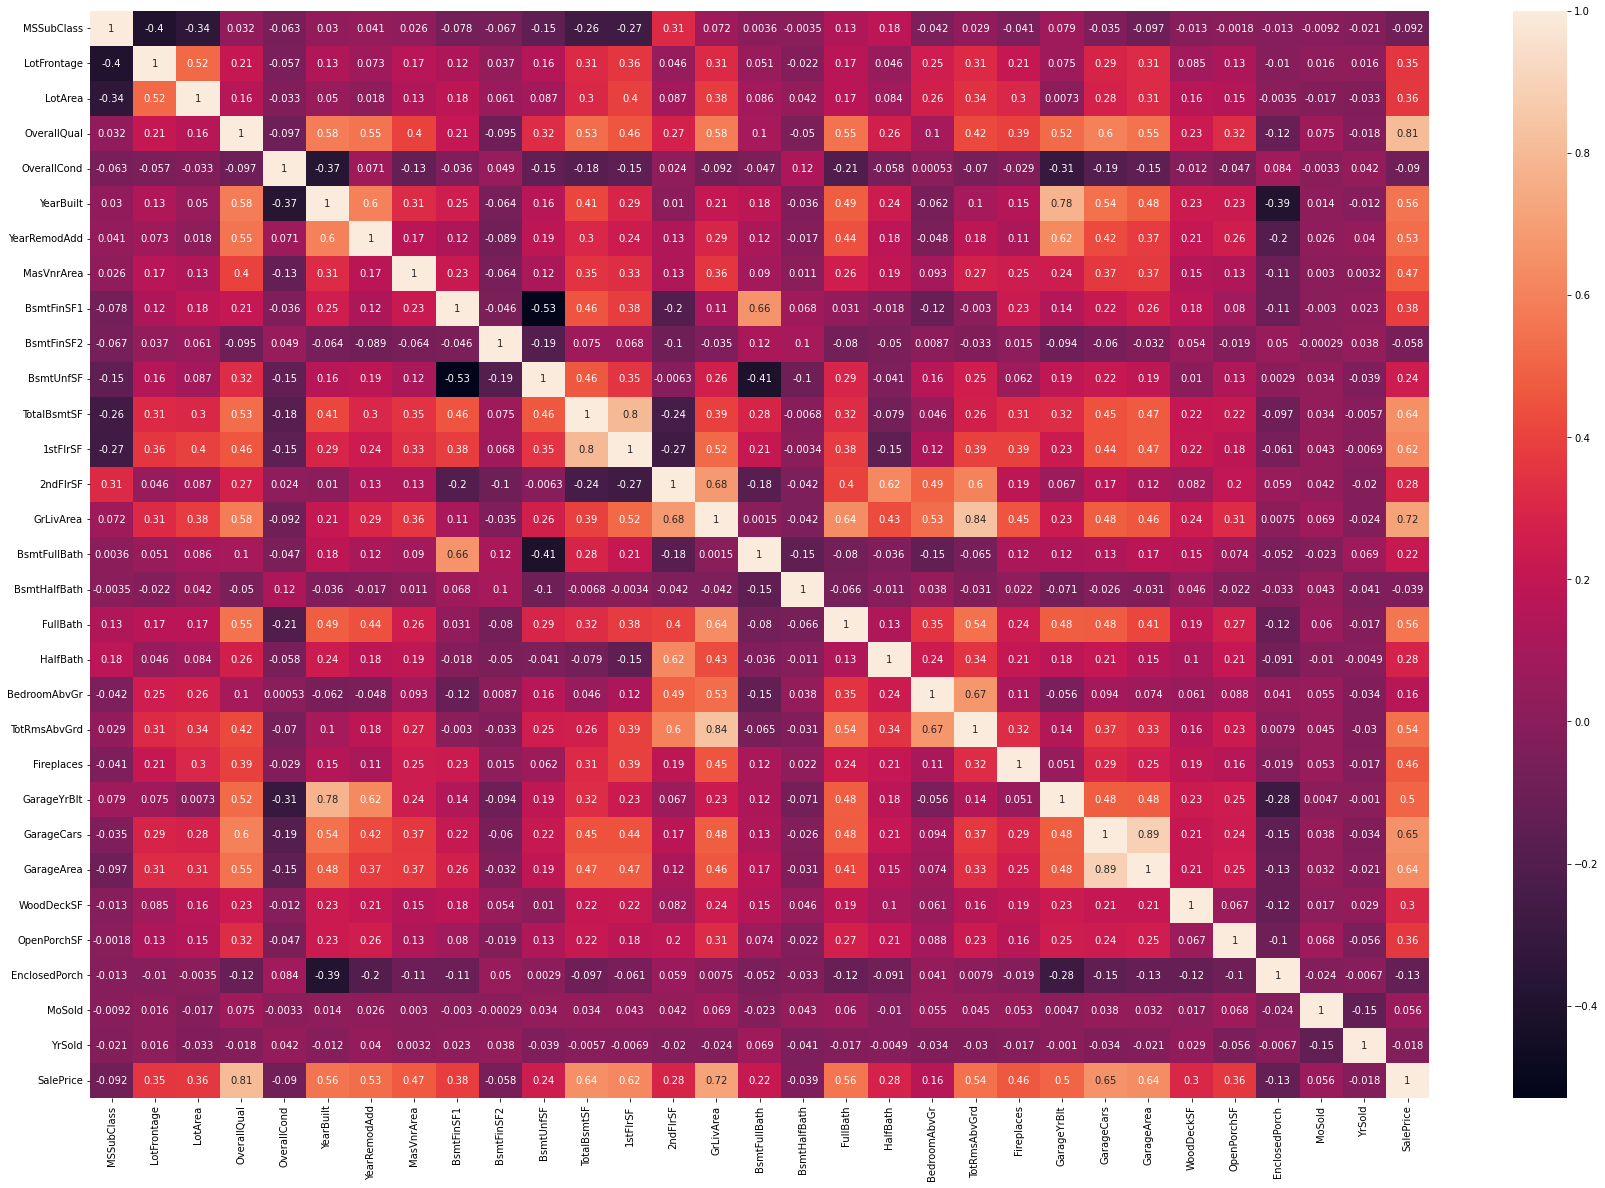

In [79]:
plt.figure(figsize=[30,20])
corr = df.drop(columns='Transformed_SalePrice', axis=1)
corr = corr.corr()
mask=np.triu(np.ones_like(corr)) 
sns.heatmap(corr, annot=True)
plt.show()

For studing, 15 variables having high correlation with sale price is taken 

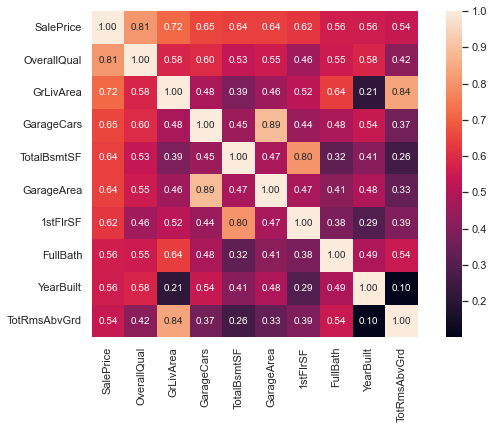

In [80]:
plt.figure(figsize=[10,6])
n = 10 
cols = corr.nlargest(n,'SalePrice')['SalePrice'].index
corrmatrix = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(corrmatrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
                yticklabels=cols.values, xticklabels=cols.values )
plt.show()

As seen above, 

Many variable are likely more correlated. This also implies that there is possibility of multicollinearity in the data

The data will be studied for multicolinearity in VIF study and will be removed in later stage 

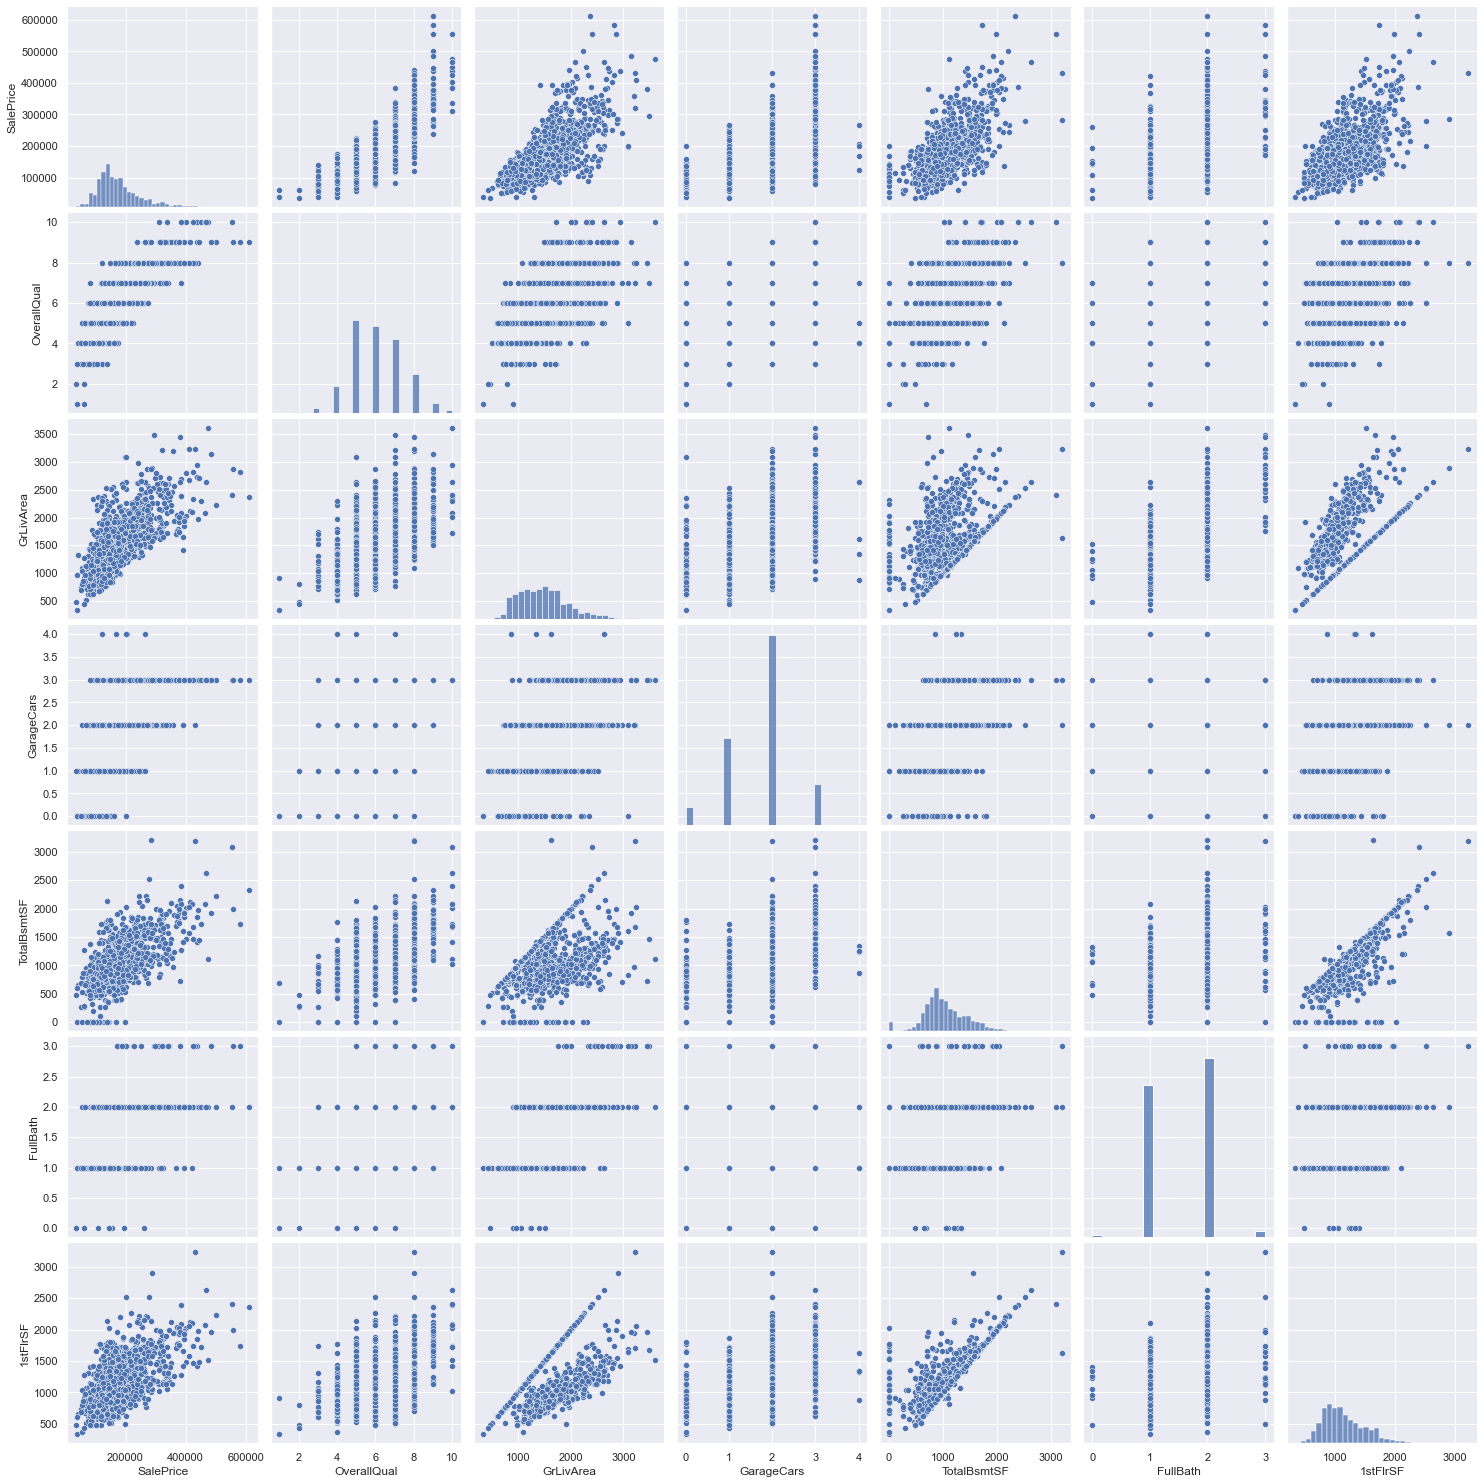

In [81]:
# Checking same with pairplot 
columns = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','1stFlrSF']
sns.pairplot(df[columns], size=3)
plt.show()

Positive corrleation is found between 1stFlrSF with the mentioned parameters : 

    1) Saleprice 
    2) GrLivArea 
    3) TotalBsmtSF
    
Positive corrleation is found between SalePrice with the mentioned parameters :   

    1) 1stFlrSF
    2) TotalBsmtSF
    3) GrLivArea

## Dummy Variable

#### Convertion of categorical variable to numeric variable

In [82]:
# categorical variable
cat_var = df.select_dtypes(include='object').columns
cat_var

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [83]:
# numerical variables
num_var = df.select_dtypes(exclude='object').columns
num_var

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold',
       'SalePrice', 'Transformed_SalePrice'],
      dtype='object')

In [84]:
print (cat_var)
print (len(cat_var))

print(num_var)
print (len(num_var))

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
33
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold',
     

In [85]:
df_dummies = pd.get_dummies(df[cat_var],drop_first=True)

In [86]:
df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [87]:
df_cat = df.select_dtypes(include='object')
df_cat.shape

(1425, 33)

In [88]:
# drop categorical column from df
df.drop(list(df_cat.columns), axis=1, inplace=True)

In [89]:
df.shape

(1425, 32)

In [90]:
#merge df and df_dummies 
df = pd.concat([df, df_dummies], axis=1)
df.shape

(1425, 207)

In [91]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


The data is now ready for model building 

## Split data into Test & Train data

In [92]:
#divide data in x and y building model
y = df['Transformed_SalePrice']
X = df.drop(['SalePrice','Transformed_SalePrice'], axis=1)

In [93]:
X.shape

(1425, 205)

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [96]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
106,30,60.0,10800,4,7,1885,1995,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
857,60,65.0,8125,6,5,1994,1995,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1006,20,69.0,12155,6,3,1970,1970,0.0,1237,0,...,0,0,0,0,1,0,0,0,1,0
1382,70,60.0,7200,7,7,1920,1950,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1386,60,80.0,16692,7,5,1978,1978,184.0,790,469,...,0,0,0,0,1,0,0,0,1,0


In [97]:
X_train.shape

(954, 205)

In [98]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (954, 205)
X_test shape (471, 205)
y_train shape (954,)
y_test shape (471,)


## Scaling of Numeric Variables

In [99]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,...,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000
mean,55.697065,69.279874,9748.810273,6.056604,5.573375,1970.875262,1983.953878,90.971698,433.957023,38.985325,...,0.002096,0.002096,0.075472,0.001048,0.878407,0.002096,0.007338,0.010482,0.835430,0.076520
std,40.943252,18.750873,3988.155596,1.357016,1.136702,29.871958,20.826822,149.719704,422.828120,132.884204,...,0.045763,0.045763,0.264289,0.032376,0.326987,0.045763,0.085389,0.101898,0.370987,0.265968
min,20.000000,21.000000,1491.000000,1.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1972.000000,1992.000000,0.000000,384.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,78.000000,11494.500000,7.000000,6.000000,2000.000000,2003.000000,149.500000,713.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,153.000000,35133.000000,10.000000,9.000000,2010.000000,2010.000000,870.000000,2188.000000,972.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 954 entries, 106 to 816
Columns: 205 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(27), uint8(175)
memory usage: 394.1 KB


In [101]:
num_var = X_train.select_dtypes(include=['int64','int32','float64','float32']).columns
print(len(num_var))
num_var

30


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold'],
      dtype='object')

In [102]:
X_train[num_var].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold
106,30,60.0,10800,4,7,1885,1995,0.0,0,0,...,6,0,1954.0,1,273,0,0,0,8,2007
857,60,65.0,8125,6,5,1994,1995,0.0,0,0,...,6,1,1994.0,2,343,0,36,0,3,2009
1006,20,69.0,12155,6,3,1970,1970,0.0,1237,0,...,7,1,1970.0,2,484,0,0,0,3,2007
1382,70,60.0,7200,7,7,1920,1950,0.0,0,0,...,8,0,1989.0,2,576,36,0,221,10,2006
1386,60,80.0,16692,7,5,1978,1978,184.0,790,469,...,12,2,1978.0,2,564,0,112,0,7,2006


In [103]:
#Scaling using MinMax scalar
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [104]:
# fit and transform on the train
X_train[num_var] = scaler.fit_transform(X_train[num_var])

# Perform only transform on the test dataset
X_test[num_var] = scaler.transform(X_test[num_var])

In [105]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
106,0.058824,0.295455,0.276708,0.333333,0.75,0.038462,0.750000,0.000000,0.000000,0.00000,...,0,0,0,0,1,0,0,0,1,0
857,0.235294,0.333333,0.197194,0.555556,0.50,0.876923,0.750000,0.000000,0.000000,0.00000,...,0,0,0,0,1,0,0,0,1,0
1006,0.000000,0.363636,0.316985,0.555556,0.25,0.692308,0.333333,0.000000,0.565356,0.00000,...,0,0,0,0,1,0,0,0,1,0
1382,0.294118,0.295455,0.169699,0.666667,0.75,0.307692,0.000000,0.000000,0.000000,0.00000,...,0,0,0,0,1,0,0,0,1,0
1386,0.235294,0.446970,0.451846,0.666667,0.50,0.753846,0.466667,0.211494,0.361060,0.48251,...,0,0,0,0,1,0,0,0,1,0


In [106]:
X_train.shape

(954, 205)

In [107]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=205)

## Building model

In [108]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [109]:
all_var = LinearRegression()
all_var.fit(X_train, y_train)

LinearRegression()

In [110]:
# verifying co-efficients  
coefficients = pd.DataFrame(all_var.coef_, X.columns, columns=['Coefficients'])
coefficients

,Coefficients
MSSubClass,-0.097193
LotFrontage,0.033038
LotArea,0.196745
OverallQual,0.383973
OverallCond,0.282321
...,...
SaleCondition_AdjLand,0.129343
SaleCondition_Alloca,-0.012537
SaleCondition_Family,-0.004545
SaleCondition_Normal,0.082053


In [111]:
# Intercept
all_var.intercept_

10.357972527849476

In [112]:
# predictions on test data 
y_pred = all_var.predict(X_test)

In [113]:
y_pred_train = all_var.predict(X_train)
y_pred_test = all_var.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric.append(mse_test_lr**0.5)

Train r2 score is : 0.9504041958572781
Test r2 score is : -483606135584273.7
Train RSS score is : 6.988224133654162
Test RSS score is : 3.654334635609867e+16
Train MSE score is : 0.007325182530035809
Test MSE score is : 77586722624413.31


As seen above, 

using all varialbe results in model which performs best in train data and not in test data

This is overfitted model and has to be mbuilt only on significant variables and not on all variables 

### Using RFE to build model 

In [114]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 40)             # reducing the number of features to 40 variables
rfe = rfe.fit(X_train, y_train)

In [115]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 38),
 ('LotFrontage', False, 49),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 18),
 ('MasVnrArea', False, 111),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 9),
 ('BsmtUnfSF', False, 8),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 154),
 ('2ndFlrSF', False, 104),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 68),
 ('BsmtHalfBath', False, 69),
 ('FullBath', False, 127),
 ('HalfBath', False, 46),
 ('BedroomAbvGr', False, 99),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', False, 90),
 ('GarageCars', False, 28),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 48),
 ('OpenPorchSF', False, 23),
 ('EnclosedPorch', False, 22),
 ('MoSold', False, 136),
 ('YrSold', False, 98),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 97),
 ('LotShape_IR3', False, 73),
 ('LotShape_

In [116]:
# Variables having significance 
col = X_train.columns[rfe.support_]  
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV',
       'Neighborhood_StoneBr', 'Condition1_RRAe', 'BldgType_Duplex',
       'Exterior1st_BrkComm', 'Exterior2nd_Other', 'Foundation_Wood',
       'BsmtCond_Po', 'Electrical_Mix', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'Functional_Min1', 'Functional_Min2',
       'Functional_Mod', 'Functional_Typ', 'GarageQual_Po', 'GarageCond_Po',
       'SaleType_CWD', 'SaleType_ConLI', 'SaleType_Oth',
       'SaleCondition_AdjLand', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object')

In [117]:
# Variables insignificant and to be eliminated 
X_train.columns[~rfe.support_]   

Index(['MSSubClass', 'LotFrontage', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath',
       ...
       'GarageCond_TA', 'PavedDrive_P', 'PavedDrive_Y', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLw', 'SaleType_New', 'SaleType_WD',
       'SaleCondition_Alloca', 'SaleCondition_Family'],
      dtype='object', length=165)

In [118]:
X_train1=X_train[col]
X_test1=X_test[col]

In [119]:
# Functions to build model using statsmodels and check VIF
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [120]:
lm_new = build_model(X_train1,y_train)

                              OLS Regression Results                             
Dep. Variable:     Transformed_SalePrice   R-squared:                       0.927
Model:                               OLS   Adj. R-squared:                  0.924
Method:                    Least Squares   F-statistic:                     291.7
Date:                   Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                           21:55:40   Log-Likelihood:                 809.83
No. Observations:                    954   AIC:                            -1538.
Df Residuals:                        913   BIC:                            -1338.
Df Model:                             40                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [121]:
HighVIF = checkVIF(lm_new)

HighVIF[ HighVIF['VIF'] >=5 ]


,Features,VIF
0,const,368.87
13,MSZoning_RL,29.26
14,MSZoning_RM,23.00
11,MSZoning_FV,8.11
32,Functional_Typ,7.35
28,KitchenQual_TA,6.93
7,GrLivArea,5.30
27,KitchenQual_Gd,5.24


In [122]:
highVIF_columns = list(HighVIF[ HighVIF['VIF'] >=5 ].Features.values)
print(len(highVIF_columns))

8


In [123]:
highVIF_columns.remove('const')

In [124]:
print(highVIF_columns)

['MSZoning_RL', 'MSZoning_RM', 'MSZoning_FV', 'Functional_Typ', 'KitchenQual_TA', 'GrLivArea', 'KitchenQual_Gd']


In [125]:
X_train1.shape 

(954, 40)

In [126]:
X_train1.drop(highVIF_columns, axis=1, inplace=True)

In [127]:
X_train1.shape 

(954, 33)

In [128]:
lm_new_2 = build_model(X_train1,y_train)

                              OLS Regression Results                             
Dep. Variable:     Transformed_SalePrice   R-squared:                       0.902
Model:                               OLS   Adj. R-squared:                  0.898
Method:                    Least Squares   F-statistic:                     256.2
Date:                   Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                           21:55:42   Log-Likelihood:                 665.88
No. Observations:                    954   AIC:                            -1264.
Df Residuals:                        920   BIC:                            -1098.
Df Model:                             33                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


The p value of Funcitonal_Mod is 0.621 which is very high

Thus removing the same and remaking the model

In [129]:
X_train1.drop('Functional_Mod', axis=1, inplace=True)
X_train1.shape

(954, 32)

In [130]:
lm_new_3 = build_model(X_train1,y_train)

                              OLS Regression Results                             
Dep. Variable:     Transformed_SalePrice   R-squared:                       0.902
Model:                               OLS   Adj. R-squared:                  0.898
Method:                    Least Squares   F-statistic:                     264.4
Date:                   Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                           21:55:42   Log-Likelihood:                 665.75
No. Observations:                    954   AIC:                            -1265.
Df Residuals:                        921   BIC:                            -1105.
Df Model:                             32                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


The p value of Funcitonal_Min2 is 0.485 which is very high

Thus removing the same and remaking the model

In [131]:
X_train1.drop('Functional_Min2', axis=1, inplace=True)
X_train1.shape

(954, 31)

In [132]:
lm_new_4 = build_model(X_train1,y_train)

                              OLS Regression Results                             
Dep. Variable:     Transformed_SalePrice   R-squared:                       0.902
Model:                               OLS   Adj. R-squared:                  0.898
Method:                    Least Squares   F-statistic:                     273.0
Date:                   Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                           21:55:43   Log-Likelihood:                 665.50
No. Observations:                    954   AIC:                            -1267.
Df Residuals:                        922   BIC:                            -1111.
Df Model:                             31                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [133]:
HighVIF = checkVIF(lm_new_4)

HighVIF[ HighVIF['VIF'] >=5 ]


,Features,VIF
0,const,68.95


The p value of Exterior2nd_Other is 0.303 which is very high

Thus removing the same and remaking the model

In [134]:
X_train1.drop('Exterior2nd_Other', axis=1, inplace=True)
X_train1.shape

(954, 30)

In [135]:
lm_new_5 = build_model(X_train1,y_train)

                              OLS Regression Results                             
Dep. Variable:     Transformed_SalePrice   R-squared:                       0.902
Model:                               OLS   Adj. R-squared:                  0.898
Method:                    Least Squares   F-statistic:                     282.1
Date:                   Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                           21:55:43   Log-Likelihood:                 664.95
No. Observations:                    954   AIC:                            -1268.
Df Residuals:                        923   BIC:                            -1117.
Df Model:                             30                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


The p value of SaleType_ConLI is 0.264 which is very high

Thus removing the same and remaking the model

In [136]:
X_train1.drop('SaleType_ConLI', axis=1, inplace=True)
X_train1.shape

(954, 29)

In [137]:
lm_new_6 = build_model(X_train1,y_train)

                              OLS Regression Results                             
Dep. Variable:     Transformed_SalePrice   R-squared:                       0.902
Model:                               OLS   Adj. R-squared:                  0.898
Method:                    Least Squares   F-statistic:                     291.7
Date:                   Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                           21:55:44   Log-Likelihood:                 664.30
No. Observations:                    954   AIC:                            -1269.
Df Residuals:                        924   BIC:                            -1123.
Df Model:                             29                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


The p value of SaleType_CWD is 0.221 which is very high

Thus removing the same and remaking the model

In [138]:
X_train1.drop('SaleType_CWD', axis=1, inplace=True)
X_train1.shape

(954, 28)

In [139]:
# Final model

X_train_lm = sm.add_constant(X_train1)
 
lr = sm.OLS(y_train,X_train_lm)
 
lm = lr.fit()
 
lm.params

const                    10.315624
LotArea                   0.293569
OverallQual               0.809485
OverallCond               0.352439
YearBuilt                 0.478420
BsmtFinSF1                0.223149
TotalBsmtSF               0.367481
TotRmsAbvGrd              0.592988
Fireplaces                0.138121
GarageArea                0.255095
MSZoning_RH               0.049816
Neighborhood_BrDale      -0.181885
Neighborhood_Crawfor      0.155863
Neighborhood_MeadowV     -0.135314
Neighborhood_StoneBr      0.133252
Condition1_RRAe          -0.152836
BldgType_Duplex          -0.125661
Exterior1st_BrkComm      -0.507352
Foundation_Wood          -0.098635
BsmtCond_Po               0.218994
Electrical_Mix           -0.332363
KitchenQual_Fa           -0.068592
Functional_Min1          -0.040766
GarageQual_Po            -0.265652
GarageCond_Po             0.150197
SaleType_Oth              0.171969
SaleCondition_AdjLand     0.196102
SaleCondition_Normal      0.091029
SaleCondition_Partia

In [140]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Transformed_SalePrice   R-squared:                       0.901
Model:                               OLS   Adj. R-squared:                  0.898
Method:                    Least Squares   F-statistic:                     301.9
Date:                   Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                           21:55:44   Log-Likelihood:                 663.53
No. Observations:                    954   AIC:                            -1269.
Df Residuals:                        925   BIC:                            -1128.
Df Model:                             28                                         
Covariance Type:               nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.3156      0.033    313.253      0.000      10.251      10.380
LotArea                   0.2936      0.040      7.319      0.000       0.215       0.372
OverallQual               0.8095      0.045     18.007      0.000       0.721       0.898
OverallCond               0.3524      0.033     10.782      0.000       0.288       0.417
YearBuilt                 0.4784      0.027     18.031      0.000       0.426       0.530
BsmtFinSF1                0.2231      0.024      9.235      0.000       0.176       0.271
TotalBsmtSF               0.3675      0.042      8.765      0.000       0.285       0.450
TotRmsAbvGrd              0.5930      0.032     18.748      0.000       0.531       0.655
Fireplaces                0.1381      0.022      6.142      0.000       0.094       0.182
GarageArea                0.2551      0.036      7.155      0.000       0.185       0.325
MSZoning_RH               0.0498      0.038      1.309      0.191      -0.025       0.125
Neighborhood_BrDale      -0.1819      0.045     -4.065      0.000      -0.270      -0.094
Neighborhood_Crawfor      0.1559      0.021      7.255      0.000       0.114       0.198
Neighborhood_MeadowV     -0.1353      0.037     -3.660      0.000      -0.208      -0.063
Neighborhood_StoneBr      0.1333      0.032      4.155      0.000       0.070       0.196
Condition1_RRAe          -0.1528      0.041     -3.690      0.000      -0.234      -0.072
BldgType_Duplex          -0.1257      0.022     -5.589      0.000      -0.170      -0.082
Exterior1st_BrkComm      -0.5074      0.124     -4.089      0.000      -0.751      -0.264
Foundation_Wood          -0.0986      0.072     -1.379      0.168      -0.239       0.042
BsmtCond_Po               0.2190      0.127      1.724      0.085      -0.030       0.468
Electrical_Mix           -0.3324      0.199     -1.672      0.095      -0.722       0.058
KitchenQual_Fa           -0.0686      0.026     -2.638      0.008      -0.120      -0.018
Functional_Min1          -0.0408      0.030     -1.375      0.169      -0.099       0.017
GarageQual_Po            -0.2657      0.113     -2.352      0.019      -0.487      -0.044
GarageCond_Po             0.1502      0.072      2.090      0.037       0.009       0.291
SaleType_Oth              0.1720      0.124      1.390      0.165      -0.071       0.415
SaleCondition_AdjLand     0.1961      0.092      2.133      0.033       0.016       0.377
SaleCondition_Normal      0.0910      0.015      6.167      0.000       0.062       0.120
SaleCondition_Partial     0.1599      0.022      7.331      0.000       0.117       0.203
==============================================================================
Omnibus:                      128.661   Durbin-Watson:                   1.973
Prob(Omnibus

All p calues of the variables are less than 0.2 

As seen above, removing the variables is not resulting in increase of r_square value
 
Thus, going forward to checking the r_square value of test data

In [141]:
from sklearn.metrics import r2_score, mean_squared_error

In [142]:
Final_col = X_train1.columns

In [143]:
X_test_new = X_test[Final_col]

In [144]:
X_test_new = sm.add_constant(X_test_new)

In [145]:
y_pred_train = lm.predict(X_train_lm)
y_pred_test = lm.predict(X_test_new)

metric_lr = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_lr.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score : {r2_test_lr}")
metric_lr.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score : {rss1_lr}")
metric_lr.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score : {rss2_lr}")
metric_lr.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score : {mse_train_lr}")
metric_lr.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score : {mse_test_lr}")
metric_lr.append(mse_test_lr**0.5)

Train r2 score is : 0.9013657397158515
Test r2 score : 0.8587568920176379
Train RSS score : 13.89791596360199
Test RSS score : 10.672932859247904
Train MSE score : 0.014568046083440242
Test MSE score : 0.02266015469054757


### Checking the train vs predicted

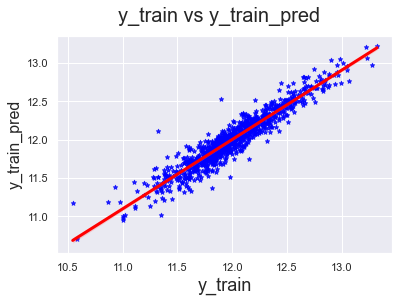

In [146]:
fig = plt.figure()
# sns.scatterplot(y_test,y_test_pred)
sns.regplot(x=y_train,y=y_pred_train, scatter_kws = {"color": 'blue',"s": 20}, line_kws = {"color": 'red', "lw": 3}, marker='*')
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              
plt.xlabel('y_train', fontsize = 18)                          
plt.ylabel('y_train_pred', fontsize = 16)
plt.show()

### Checking test vs predicted

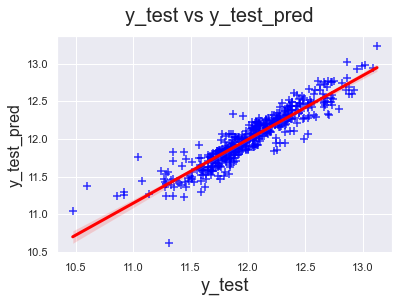

In [147]:
# Plotting graph b/w actual and predicted values with test data

fig = plt.figure()
# sns.scatterplot(y_test,y_test_pred)
sns.regplot(x=y_test,y=y_pred_test, scatter_kws = {"color": 'blue',"s": 50}, line_kws = {"color": 'red', "lw": 3}, marker='+')
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

### Checking train residuals 

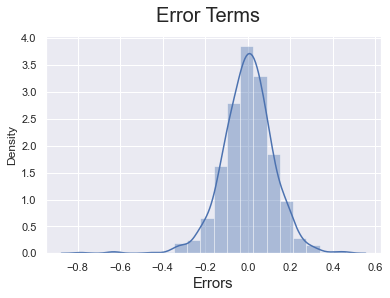

In [148]:
res = y_train - y_pred_train
fig = plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=15)
plt.show()

### Checking Test residuals 

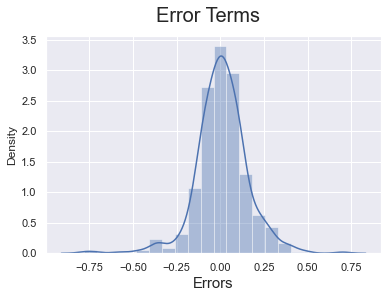

In [149]:
res = y_test - y_pred_test
fig = plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=15)
plt.show()

### Checking for heteroskedasticity

Text(0, 0.5, 'Residuals')

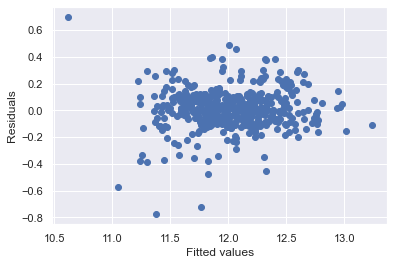

In [150]:
plt.scatter(y_pred_test,y_test-y_pred_test)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

Assumptions verificarion : 

1. Error terms are normally distributed 

2. Error terms have mean zero 

3. There is linear relation between target and prediction variables 

4. Error terms are independent of each other 

5. No terms with High VIF, means that there is no multicollinearity in the model  


R_squared of train = 0.9013

R_squared of test = 0.8587

### Coefficients of Linear regression

In [151]:
df_lr = pd.DataFrame(index=X_train1.columns)
df_lr.rows = X_train1.columns
df_lr['LR'] = lm.params
df_lr

,LR
LotArea,0.293569
OverallQual,0.809485
OverallCond,0.352439
YearBuilt,0.478420
BsmtFinSF1,0.223149
TotalBsmtSF,0.367481
TotRmsAbvGrd,0.592988
Fireplaces,0.138121
GarageArea,0.255095
MSZoning_RH,0.049816


## Ridge & Lasso Regression

In [152]:
# Importing required libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

### Ridge :

In [153]:
X_train = X_train[Final_col]
X_test = X_test[Final_col]

In [154]:
# list of alphas to tune
params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}
ridge = Ridge()
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error', cv = folds, return_train_score=True,verbose = 1)            
ridge_model_cv.fit(X_train1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [155]:
cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012796,0.003916,0.007999,0.005057,0.0001,{'alpha': 0.0001},-0.089279,-0.088221,-0.084839,-0.111358,...,-0.095232,0.010049,12,-0.090821,-0.091183,-0.091546,-0.086322,-0.087531,-0.089480,0.002133
1,0.009599,0.003199,0.007998,0.005059,0.001,{'alpha': 0.001},-0.089277,-0.088222,-0.084840,-0.111355,...,-0.095231,0.010048,11,-0.090823,-0.091184,-0.091548,-0.086323,-0.087533,-0.089482,0.002133
2,0.009601,0.003201,0.006399,0.003200,0.01,{'alpha': 0.01},-0.089255,-0.088234,-0.084854,-0.111324,...,-0.095226,0.010036,10,-0.090847,-0.091191,-0.091568,-0.086338,-0.087552,-0.089499,0.002133
3,0.012802,0.003920,0.006399,0.003200,0.05,{'alpha': 0.05},-0.089176,-0.088285,-0.084912,-0.111192,...,-0.095207,0.009985,8,-0.090955,-0.091221,-0.091648,-0.086402,-0.087635,-0.089572,0.002133
4,0.014398,0.003201,0.006402,0.003201,0.1,{'alpha': 0.1},-0.089106,-0.088343,-0.084975,-0.111040,...,-0.095187,0.009924,6,-0.091071,-0.091266,-0.091737,-0.086471,-0.087728,-0.089654,0.002135


In [156]:
optimalvalue_ridge = ridge_model_cv.best_params_['alpha']
optimalvalue_ridge

0.3

In [157]:
#final regression model
alpha = optimalvalue_ridge
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=0.3)

In [158]:
df_ridge = pd.DataFrame(index=X_train.columns)
df_ridge.rows = X_train.columns
df_ridge['Ridge'] = ridge.coef_
df_ridge

,Ridge
LotArea,0.289009
OverallQual,0.794951
OverallCond,0.345850
YearBuilt,0.477251
BsmtFinSF1,0.223583
TotalBsmtSF,0.365097
TotRmsAbvGrd,0.588670
Fireplaces,0.143452
GarageArea,0.257970
MSZoning_RH,0.046849


In [159]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_r = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_r.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_r.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_r.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_r.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_r.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_r.append(mse_test_lr**0.5)

Train r2 score is : 0.9010909846104773
Test r2 score is : 0.8613061994691426
Train RSS score is : 13.93662992925714
Test RSS score is : 10.480296293427736
Train MSE score is : 0.014608626760227611
Test MSE score is : 0.022251159858657613


## Lasso Regression

In [160]:
params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}
lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [161]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012799,0.003919,0.006396,0.003198,0.0001,{'alpha': 0.0001},-0.088851,-0.088839,-0.084976,-0.110613,...,-0.095135,0.009743,1,-0.091411,-0.091275,-0.092197,-0.086678,-0.088076,-0.089927,0.002152
1,0.015999,0.000003,0.006399,0.003200,0.001,{'alpha': 0.001},-0.090593,-0.092267,-0.085938,-0.111751,...,-0.096468,0.009219,2,-0.094081,-0.093948,-0.095576,-0.088854,-0.091853,-0.092863,0.002329
2,0.014402,0.003201,0.006395,0.003198,0.01,{'alpha': 0.01},-0.124690,-0.131331,-0.126474,-0.153930,...,-0.132726,0.010823,3,-0.131055,-0.130456,-0.132843,-0.127648,-0.130225,-0.130445,0.001673
3,0.009601,0.003203,0.004801,0.006402,0.05,{'alpha': 0.05},-0.267200,-0.301937,-0.275983,-0.318357,...,-0.286265,0.020415,4,-0.287568,-0.284771,-0.289741,-0.285628,-0.282515,-0.286045,0.002459
4,0.012801,0.003920,0.006400,0.003200,0.1,{'alpha': 0.1},-0.281848,-0.311387,-0.287224,-0.323616,...,-0.297537,0.016843,5,-0.301214,-0.294331,-0.299982,-0.290951,-0.300753,-0.297446,0.004085


In [162]:
optimalvalue_lasso = model_cv.best_params_['alpha']
optimalvalue_lasso

0.0001

In [163]:
alpha = optimalvalue_lasso
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [164]:
df_lasso = pd.DataFrame(index=X_train.columns)
df_lasso.rows = X_train.columns
df_lasso['Lasso'] = lasso.coef_
df_lasso

,Lasso
LotArea,0.290973
OverallQual,0.810747
OverallCond,0.342884
YearBuilt,0.474970
BsmtFinSF1,0.223032
TotalBsmtSF,0.365693
TotRmsAbvGrd,0.588203
Fireplaces,0.139907
GarageArea,0.250813
MSZoning_RH,0.037212


In [165]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_l = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_l.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_l.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_l.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_l.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_l.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_l.append(mse_test_lr**0.5)

Train r2 score is : 0.900657081311003
Test r2 score is : 0.8624650898525295
Train RSS score is : 13.99776843807803
Test RSS score is : 10.392725583395919
Train MSE score is : 0.014672713247461246
Test MSE score is : 0.02206523478428008


In [166]:
comparison = pd.DataFrame(index=X_train.columns)
comparison.rows = X_train.columns

comparison['Linear'] = lm.params
comparison['Ridge'] = ridge.coef_
comparison['Lasso'] = lasso.coef_

In [167]:
comparison.sort_values(by='Lasso', ascending=False)

,Linear,Ridge,Lasso
OverallQual,0.809485,0.794951,0.810747
TotRmsAbvGrd,0.592988,0.588670,0.588203
YearBuilt,0.478420,0.477251,0.474970
TotalBsmtSF,0.367481,0.365097,0.365693
OverallCond,0.352439,0.345850,0.342884
LotArea,0.293569,0.289009,0.290973
GarageArea,0.255095,0.257970,0.250813
BsmtFinSF1,0.223149,0.223583,0.223032
SaleCondition_Partial,0.159851,0.162313,0.157994
Neighborhood_Crawfor,0.155863,0.155022,0.153744


In [168]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_lr}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rg_metric = pd.Series(metric_r, name = 'Ridge Regression')
ls_metric = pd.Series(metric_l, name = 'Lasso Regression')

Consolidated = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

Consolidated

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.901366,0.901091,0.900657
1,R2 Score (Test),0.858757,0.861306,0.862465
2,RSS (Train),13.897916,13.936630,13.997768
3,RSS (Test),10.672933,10.480296,10.392726
4,MSE (Train),0.120698,0.120866,0.121131
5,MSE (Test),0.150533,0.149168,0.148544


As per the above table, it is observed that 

1. Doing regularization improved the performance of the model with unseen data (test data)

2. Lasso observed to perform slightly better than the regular linear regression and ridge (R2 of Lasso is 0.8624)

3. Remaining values seems to be haivng only slight variation, with lasso as better. 

# Problem Statement 2 

In [169]:
print(f"Ridge Optimal aplha value : {optimalvalue_ridge}")
print(f"Lasso Optimal aplha value : {optimalvalue_lasso}")

Ridge Optimal aplha value : 0.3
Lasso Optimal aplha value : 0.0001


In [170]:
# Doubing the value of optimal alpha 

optimalvalue_ridge *= 2
optimalvalue_lasso *= 2
print(f"Doubled alpha values of Ridge is {optimalvalue_ridge} and Lasso is {optimalvalue_lasso}")

Doubled alpha values of Ridge is 0.6 and Lasso is 0.0002


In [171]:
#build lasso reg model
alpha = optimalvalue_lasso
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [172]:
df_lasso = pd.DataFrame(index=X_train.columns)
df_lasso.rows = X_train.columns
df_lasso['Lasso'] = lasso.coef_
df_lasso

,Lasso
LotArea,0.287254
OverallQual,0.817756
OverallCond,0.338498
YearBuilt,0.471267
BsmtFinSF1,0.222022
TotalBsmtSF,0.362510
TotRmsAbvGrd,0.583019
Fireplaces,0.142248
GarageArea,0.247751
MSZoning_RH,0.025558


In [173]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_double_l = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_double_l.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_double_l.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_double_l.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_double_l.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_double_l.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_double_l.append(mse_test_lr**0.5)

Train r2 score is : 0.8995849093095859
Test r2 score is : 0.8649835555627775
Train RSS score is : 14.148841263395457
Test RSS score is : 10.202419551351138
Train MSE score is : 0.014831070506703833
Test MSE score is : 0.021661188007114942


In [174]:
#build reg model
alpha = optimalvalue_ridge
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=0.6)

In [175]:
df_ridge = pd.DataFrame(index=X_train.columns)
df_ridge.rows = X_train.columns
df_ridge['Ridge'] = ridge.coef_
df_ridge

,Ridge
LotArea,0.284534
OverallQual,0.782936
OverallCond,0.339583
YearBuilt,0.475662
BsmtFinSF1,0.223504
TotalBsmtSF,0.362893
TotRmsAbvGrd,0.584012
Fireplaces,0.148273
GarageArea,0.261017
MSZoning_RH,0.044287


In [176]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_double_r = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_double_r.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_double_r.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_double_r.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_double_r.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_double_r.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_double_r.append(mse_test_lr**0.5)

Train r2 score is : 0.9006434066829812
Test r2 score is : 0.8624324256313858
Train RSS score is : 13.99969524150854
Test RSS score is : 10.395193831540173
Train MSE score is : 0.014674732957556122
Test MSE score is : 0.022070475226199943


In [177]:
comparison['Ridge_Double'] = ridge.coef_
comparison['Lasso_Double'] = lasso.coef_

In [178]:
comparison.sort_values(by='Lasso', ascending=False)

,Linear,Ridge,Lasso,Ridge_Double,Lasso_Double
OverallQual,0.809485,0.794951,0.810747,0.782936,0.817756
TotRmsAbvGrd,0.592988,0.588670,0.588203,0.584012,0.583019
YearBuilt,0.478420,0.477251,0.474970,0.475662,0.471267
TotalBsmtSF,0.367481,0.365097,0.365693,0.362893,0.362510
OverallCond,0.352439,0.345850,0.342884,0.339583,0.338498
LotArea,0.293569,0.289009,0.290973,0.284534,0.287254
GarageArea,0.255095,0.257970,0.250813,0.261017,0.247751
BsmtFinSF1,0.223149,0.223583,0.223032,0.223504,0.222022
SaleCondition_Partial,0.159851,0.162313,0.157994,0.163836,0.154720
Neighborhood_Crawfor,0.155863,0.155022,0.153744,0.154078,0.150484


In [179]:
rg_metric = pd.Series(metric_double_r, name = 'Double Ridge Regression')
ls_metric = pd.Series(metric_double_l, name = 'Double Lasso Regression')

Consolidated = pd.concat([Consolidated, rg_metric, ls_metric], axis = 1)

Consolidated

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Double Ridge Regression,Double Lasso Regression
0,R2 Score (Train),0.901366,0.901091,0.900657,0.900643,0.899585
1,R2 Score (Test),0.858757,0.861306,0.862465,0.862432,0.864984
2,RSS (Train),13.897916,13.936630,13.997768,13.999695,14.148841
3,RSS (Test),10.672933,10.480296,10.392726,10.395194,10.202420
4,MSE (Train),0.120698,0.120866,0.121131,0.121139,0.121783
5,MSE (Test),0.150533,0.149168,0.148544,0.148561,0.147177


    ### After doubling the alpha values, 

    There is minor variation in the R2 values, 

    Upon increasing the value of alpha, the R2 value of train data will be reduced, since this is basically making the data more general. 

    Upon continuing increasing the alpha value, the model will become underfitted and R2 of both train and test will be reduced


In [180]:
# Top 5 variables after doubling
comparison.sort_values(by='Lasso_Double', ascending=False).Lasso_Double.head()

OverallQual     0.817756
TotRmsAbvGrd    0.583019
YearBuilt       0.471267
TotalBsmtSF     0.362510
OverallCond     0.338498
Name: Lasso_Double, dtype: float64

In [181]:
# Removing top 5 variables of Lasso and developing the model 
top5 = list(comparison['Lasso'].sort_values(ascending=False).head(5).index)
top5

['OverallQual', 'TotRmsAbvGrd', 'YearBuilt', 'TotalBsmtSF', 'OverallCond']

In [182]:
print(X_train1.shape)

(954, 28)


In [183]:
New = X_train1.drop(top5, axis=1)
New

,LotArea,BsmtFinSF1,Fireplaces,GarageArea,MSZoning_RH,Neighborhood_BrDale,Neighborhood_Crawfor,Neighborhood_MeadowV,Neighborhood_StoneBr,Condition1_RRAe,...,BsmtCond_Po,Electrical_Mix,KitchenQual_Fa,Functional_Min1,GarageQual_Po,GarageCond_Po,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial
106,0.276708,0.000000,0.000000,0.196403,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
857,0.197194,0.000000,0.333333,0.246763,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1006,0.316985,0.565356,0.333333,0.348201,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1382,0.169699,0.000000,0.000000,0.414388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1386,0.451846,0.361060,0.666667,0.405755,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,0.137893,0.358318,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
54,0.167737,0.175503,0.333333,0.411511,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
359,0.312704,0.436929,0.333333,0.425899,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
80,0.342102,0.204753,0.333333,0.366187,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [184]:
params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}
lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(New, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [185]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011202,0.003918,0.006399,0.003199,0.0001,{'alpha': 0.0001},-0.171140,-0.178647,-0.187174,-0.184706,...,-0.182744,0.007233,1,-0.176174,-0.176721,-0.173074,-0.175693,-0.172071,-0.174747,0.001832
1,0.014398,0.005989,0.006398,0.005985,0.001,{'alpha': 0.001},-0.174153,-0.181005,-0.185219,-0.186285,...,-0.184265,0.006723,2,-0.180580,-0.180017,-0.177755,-0.178217,-0.175990,-0.178512,0.001647
2,0.009600,0.003201,0.003198,0.003917,0.01,{'alpha': 0.01},-0.193329,-0.206893,-0.201357,-0.222042,...,-0.205880,0.009383,3,-0.205296,-0.204630,-0.205380,-0.203373,-0.202952,-0.204326,0.000994
3,0.011199,0.006400,0.009601,0.003199,0.05,{'alpha': 0.05},-0.281848,-0.311387,-0.287224,-0.323616,...,-0.297537,0.016843,4,-0.301214,-0.294331,-0.299982,-0.290951,-0.300753,-0.297446,0.004085
4,0.014395,0.009332,0.004800,0.003919,0.1,{'alpha': 0.1},-0.281848,-0.311387,-0.287224,-0.323616,...,-0.297537,0.016843,4,-0.301214,-0.294331,-0.299982,-0.290951,-0.300753,-0.297446,0.004085


In [186]:
optimalvalue_lasso = model_cv.best_params_['alpha']
optimalvalue_lasso

0.0001

In [187]:
alpha = optimalvalue_lasso
lasso = Lasso(alpha=alpha)
lasso.fit(New, y_train)

Lasso(alpha=0.0001)

In [188]:
df_lasso.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
OverallQual,0.817756
TotRmsAbvGrd,0.583019
YearBuilt,0.471267
TotalBsmtSF,0.362510
OverallCond,0.338498
